# D213 TASK 1: TIME SERIES MODELING

### Information

* Matthew Blasa
* Student ID: 001781641
* MS Data Analytics (05/01/2021)
* Program Mentor: Kirk Kelly
* (503)805-0297
* mblasa@wgu.edu

# Scenario Used: Scenario 2
In the telecommunications industry, customers can choose from multiple service providers
and actively switch from one provider to another. Customer churn is defined as the
percentage of customers who stopped using a provider’s product or service during a certain
time frame. In this highly competitive market, some telecommunications industries can
experience average annual churn rates as high as 25%. Given that it costs 10 times more to
acquire a new customer than to retain an existing one, customer retention has now become
even more important than customer acquisition.
<br><br>
For many providers, retaining highly profitable customers is the number one business goal.
To reduce customer churn, telecommunications companies need to predict which customers
are at high risk of churn.
As part of the “churn” project, executives would like to see consider a time series on
revenue from the first years of operation. Once they understand any patterns in that data,
they feel confident in understanding the impact of churn in current times. The given time
series data records the daily revenue, in million dollars, during the first two years of
operation.
<br><br>
Data File being used:
teleco_time_series.csv
<br><br>
<b>Data Dictionary</b>:
<br>
The data set consists of 731 rows (days) and two columns or variables:
* <b>Day</b>: Day during first two years of operation
* <b>Revenue</b>: Revenue in million dollars

# Part I: Research Questions

## A1. Research Question

What does the projected revenue trend look like in the next year?"


## A2. Objectives and Goals

The objectives of this time series analysis are to:
1. Explore the data for structure and content.
2. Make necessary transformations.
3. Find a model that gives the most accurate fit to the data.
4. Use the model to forecast predicted revenue for the following year.

I aim to identify meaning full patterns that will give a better sense of what influences projected revenue. The outcome of this analysis is to make recommendations that can increase profits and determine significant trends that influence profits.

# Part II: Method Justification

## B. Assumptions

To perform a time series analysis, the following assumptions are made about the data:
1. The data should be stationary - The distribution of the data should not change over time. Patterns observed in time series are expected to persist in the future. If the data shows any trends or changes due to season, it must be transformed before performing the analysis. (Hilpisch, p. 205)

2. The autocorrelation should be constant - The way each value in the time series is related to its neighbors should remain the same. Seasonality will need to be reduced or accounted for.  Autocorrelation in the data means there is not only similarity, but a relationship between the values in the current variable and its past values.


# Part III: Data Preparation

## C1. Line Graph Visualization

In [1]:
# Import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy import signal
import statsmodels.api as sm
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore') # Ignore warning messages for readability

In [2]:
# Read in data set and view head
df = pd.read_csv('teleco_time_series.csv', index_col = 'Day', parse_dates = True)
pd.options.display.max_columns = None
df.head()

,Revenue
Day,
1,0.000000
2,0.000793
3,0.825542
4,0.320332
5,1.082554


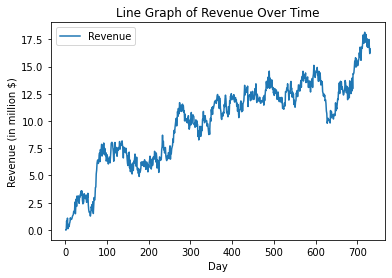

In [3]:
# Plot the time series
df.plot()
plt.title("Line Graph of Revenue Over Time")
plt.ylabel("Revenue (in million $)")
plt.show();

In [4]:
# View column names and data types
print("The last index in the dataframe is", df.index[-1], "and there are", len(df), "records present.")
print("This means that there are no gaps in the time sequence.")

The last index in the dataframe is 731 and there are 731 records present.
This means that there are no gaps in the time sequence.


In [5]:
# Import standard data science libraries for mathematics, statistics and visualization packages
import numpy as np # linear algebra
import pandas as pd # dataset processing

# Import visualization packages
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
# Change color of Matplotlib font for display on dark theme Jupyter notebook
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [7]:
# Increase Jupyter display cell-width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [8]:
# Set plot style to ggplot for aesthetics & R style
plt.style.use('ggplot')

In [9]:
# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Load time series dataset
teleco_df = pd.read_csv('teleco_time_series.csv')

In [11]:
# Print head of dataset
teleco_df.head(10)

,Day,Revenue
0,1,0.000000
1,2,0.000793
2,3,0.825542
3,4,0.320332
4,5,1.082554
5,6,0.107654
6,7,0.493901
7,8,0.376698
8,9,0.304075
9,10,0.591748


In [12]:
# Visualize inital line graph of dataset
def plot_data(df, x, y, title='', xlabel='Day', ylabel='Revenue', dpi=100):
    plt.figure(figsize=(15, 4), dpi=100)
    plt.plot(x, y)
    plt.gca().set(title='', xlabel='Day', ylabel='Revenue')
    plt.show()


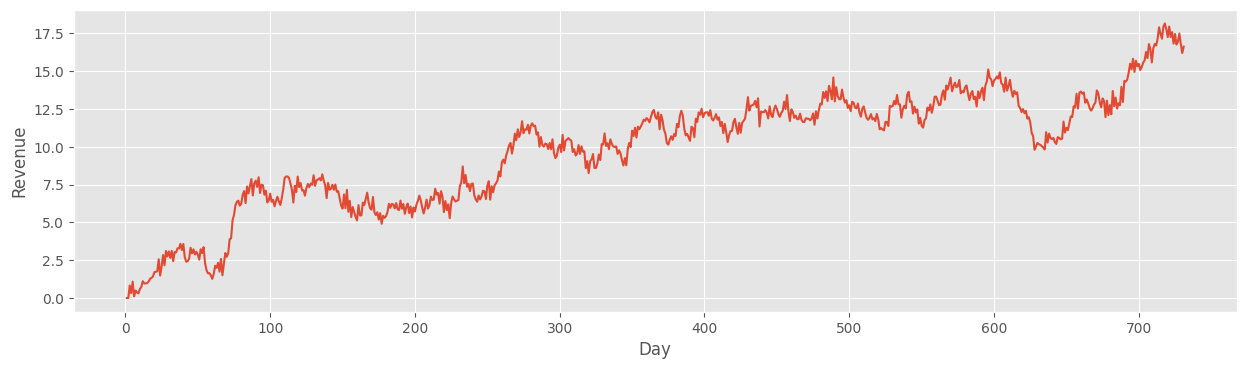

In [13]:
    
plot_data(teleco_df, x=teleco_df['Day'], y=teleco_df['Revenue'], 
        title='Teleco Revenue in millions for last two years')

## C2. Time Step Formatting

We will first display the length of the time series sequence and then describe the step formatting

In [14]:
# Get basic info for DataFrame
teleco_df.info

<bound method DataFrame.info of      Day    Revenue
0      1   0.000000
1      2   0.000793
2      3   0.825542
3      4   0.320332
4      5   1.082554
..   ...        ...
726  727  16.931559
727  728  17.490666
728  729  16.803638
729  730  16.194813
730  731  16.620798

[731 rows x 2 columns]>

In [15]:
# Get data types of features
teleco_df.dtypes

Day          int64
Revenue    float64
dtype: object

In [16]:
# Check for missing data
print(teleco_df.isnull().values.any())

False


In [17]:
# Check for NAs
print(teleco_df.isna().values.any())

False


There are no missing values or NAs in the time step formatting.

In [18]:
# Check duplicates in Day
print(teleco_df.Day.duplicated().sum())

0


There are no duplicates.  Let us now get the descriptive statistics to confirm we have no gaps in measurement in the Day column.

In [19]:
print(teleco_df.describe())

              Day     Revenue
count  731.000000  731.000000
mean   366.000000    9.822901
std    211.165812    3.852645
min      1.000000    0.000000
25%    183.500000    6.872836
50%    366.000000   10.785571
75%    548.500000   12.566911
max    731.000000   18.154769


## C3. Stationarity

We will evaluate the stationarity of the time series data by performing a Dicky-Fuller test for confirmation.

In [20]:
# Run stationarity test
result = adfuller(df['Revenue'])

# Print test statistic
print("The t-statistic is:", round(result[0],2))

# Print p-value
print("The p-value is:", round(result[1],2))

# Print critical values
crit_vals = result[4]
print("The critical value of the t-statistic for a 95% confidence level is:", round(crit_vals['5%'],2)) 

The t-statistic is: -1.92
The p-value is: 0.32
The critical value of the t-statistic for a 95% confidence level is: -2.87


### Analysis of Stationarity
 The data was evaluated using the augmented Dickey-Fuller test. This method uses the null-hypothesis that the time series is nonstationary due to trend (Fulton, n.d.). This test returned a t-statistic of -1.92 and a p-value of 0.32. To achieve a confidence level of 95% that we should reject the null hypothesis, the t-statistic should be below -2.87 and the p-value should be below 0.05. Both the results of the t-statistic and the p-value give evidence to reject the null. 
 

Therefore, the data will require a transformation to execute the ARIMA model since it is not stationary.

## C4. Steps to Prepare the Data
Since the ARIMA model can take trends and seasonality into account, I will not transform the data before splitting it into training and test data. The steps that I will take to ensure that the data is prepared for the ARIMA model are:

1. Check data for null values.
2. Add dummy dates of the datetime data type for analysis.
3. Split the data into 80% training and 20% testing data.

In [21]:
# Split the DataFrame in half
df['Day'] = df.index
teleco_train = df.iloc[:len(df) - 365]

teleco_train['teleco_train'] = teleco_train['Revenue']
del teleco_train['Day']
del teleco_train['Revenue']

In [22]:
# Test set
teleco_test = df.iloc[len(df) - 365:]

teleco_test['teleco_test'] = teleco_test['Revenue']
del teleco_test['Day']
del teleco_test['Revenue']

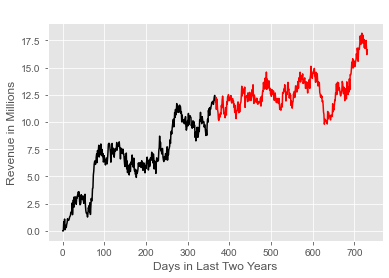

In [23]:
# Visualize training and test sets side-by-side
plt.plot(teleco_train, color='black')
plt.plot(teleco_test, color='red')
plt.title('Train/Test Split for Teleco Revenue')
plt.xlabel('Days in Last Two Years')
plt.ylabel('Revenue in Millions')
sns.set()
plt.show()

We will now split the DataFrame into training and test sets.

In [24]:
df1 = df.values.flatten()

# Create dummy dates for the Arima modules
dates = pd.date_range('1900-1-1', periods=len(df1), freq='D')

# Add the dates and the data to a new dataframe
ts = pd.DataFrame({'dates': dates, 'Revenue': df1})

# Set the dataframe index to be the dates column
df_ts = ts.set_index('dates')
df_ts.head()

,Revenue
dates,
1900-01-01,0.000000
1900-01-02,1.000000
1900-01-03,0.000793
1900-01-04,2.000000
1900-01-05,0.825542


In [25]:
# Determine cut off for an 80% training/20% testing data split
cutoff = round(len(df_ts)* 0.8)
cutoff_date = df_ts.iloc[[585]].index.values
Y, M, D, h, m, s = [cutoff_date.astype(f"M8[{x}]") for x in "YMDhms"]

# Print cutoff record and date
print("80% of the data includes", cutoff, "records.")
print ("The date for at index", cutoff, "is:", D)

80% of the data includes 1170 records.
The date for at index 1170 is: ['1901-08-09']


In [26]:
# Determine cut off for an 80% training/20% testing data split
cutoff = round(len(df_ts)* 0.8)
cutoff_date = df_ts.iloc[[585]].index.values
Y, M, D, h, m, s = [cutoff_date.astype(f"M8[{x}]") for x in "YMDhms"]

# Print cutoff record and date
print("80% of the data includes", cutoff, "records.")
print ("The date for at index", cutoff, "is:", D)

80% of the data includes 1170 records.
The date for at index 1170 is: ['1901-08-09']


In [27]:
# Split the data into 80% training and 20% test sets. View tail of training set to make sure it stops at cutoff date.
df_train = df_ts.iloc[:cutoff + 1]
df_test = df_ts.iloc[cutoff + 1:]
df_train.tail(1)

,Revenue
dates,
1903-03-17,13.152903


In [28]:
# Ensure test data starts the day after the cutoff date
df_test.head(1)

,Revenue
dates,
1903-03-18,586.0


In [29]:
# Ensure the training and test data still contain 731 records total
print("The training and test sets combined contain",len(df_train)+len(df_test), "records.")

The training and test sets combined contain 1462 records.


## C5. Cleaned Dataset
Cleaned dataset is extracted as "teleco_time_series_prepared.csv."

In [30]:
# Extract Clean dataset
df.to_csv('teleco_time_series_prepared.csv')

In [31]:
# Save the training, and test sets to Excel files
df_train.to_csv('timeseries_train.csv', index = False, encoding = 'utf-8') 
df_test.to_csv('timeseries_test.csv', index = False, encoding = 'utf-8') 

# Part IV: Model Identification and Analysis

## D1. Report Findings and Visualizations

#### Seasonality
Time series data often has skew because of sesonality. Seasonality is an observable repeating cycle, which may be a of day or the season of the year.  

Since it is indeed a repeating cycle, we can anticipate these changes.  Based on our decomposition, there is a very clear presence of seasonality (see below).

#### Trends 
A trend is shown by the general direction of the time series period over long measure of time.  Our general direction for the Teleco company over two years is gradually increasing revenue or an upward trend (see below).

#### Residuals 
Residuals, also known as "errors," are the differences between observed and predicted values in the data.  They are a diagnostic measure used when assessing the quality of a model (Bock).  From the results of the decomposition, there is no noticeable trend in residuals (see below).

In [32]:
# Calculate the first difference of the time series
df_diff = df.diff().dropna()

In [33]:
# Run stationarity test
result = adfuller(df_diff['Revenue'])

# Print test statistic
print("The t-statistic is:", round(result[0],2))

# Print p-value
print("The p-value is:", round(result[1],2))

# Print critical values
crit_vals = result[4]
print("The critical value of the t-statistic for a 95% confidence level is:", round(crit_vals['5%'],2)) 

The t-statistic is: -44.87
The p-value is: 0.0
The critical value of the t-statistic for a 95% confidence level is: -2.87


#### Check for seasonality with autocorrelation plot

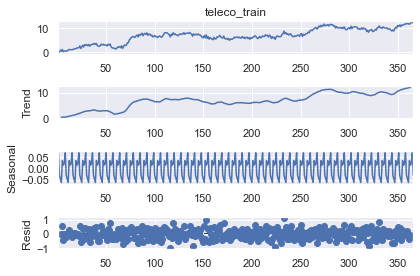

In [34]:
# Decompose the training set
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(teleco_train['teleco_train'], model='additive', period=7)
decompose.plot()
plt.show()

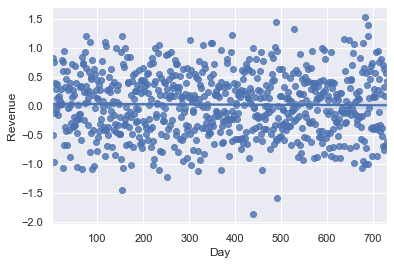

In [35]:
 #Display plot to check for trends in data
sns.regplot(x=df_diff.index,y='Revenue',data=df_diff, fit_reg=True);

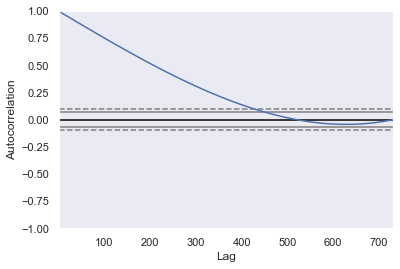

In [36]:
# Check for seasonality with autocorrelation plot
pd.plotting.autocorrelation_plot(df);

### Check for Trends

Text(0, 0.5, 'Teleco Revenue Trend')

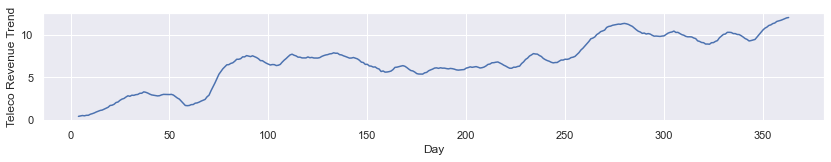

In [37]:
# Run the trend component 
decompose_trend = decompose.trend

ax = decompose_trend.plot(figsize=(14,2))
ax.set_xlabel('Day')
ax.set_ylabel('Teleco Revenue Trend')

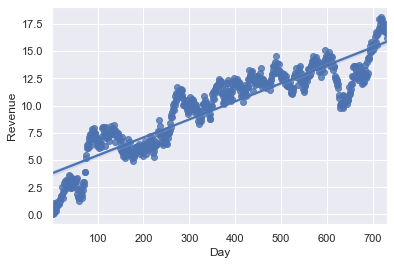

In [38]:
# Display plot to check for trends in data 
sns.regplot(x=df.index,y='Revenue',data=df, fit_reg=True);

The plot shows that there is an upward positive trend in the data over time.

### Autocorrelation 


Autocorrelation determines the strength of the relationship of past values to present and future values.  An autocorrelation plot will visually display the strength of that relationship (Brownlee, p. 1). 

At all lags we have high correlations. 
* At 31 days (month) = 0.8691
* 62 days (2 months) = 0.7758 
* 182 days (6 months) = 0.8140.  

Calculations and visualization are below.

In [39]:
# Run autocorrelation coefficient with one month lag
autocorrelation_lag1 = teleco_df['Revenue'].autocorr(lag=31)
print("One Month (31 days) Lag: ", autocorrelation_lag1)

One Month (31 days) Lag:  0.8690526347331857


In [40]:
# Run autocorrelation coefficient with two month and six month lag
autocorrelation_lag3 = teleco_df['Revenue'].autocorr(lag=62)
print("Two Months Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = teleco_df['Revenue'].autocorr(lag=182)
print("Six Months Lag: ", autocorrelation_lag6)

Two Months Lag:  0.7758400879703407
Six Months Lag:  0.8139870392893127


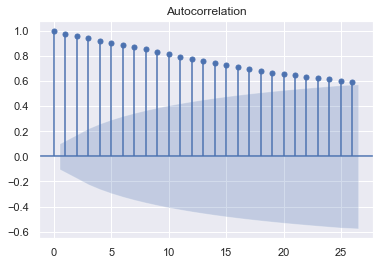

In [41]:
# Plot autocorrelation function with training set
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(teleco_train)
plt.show()

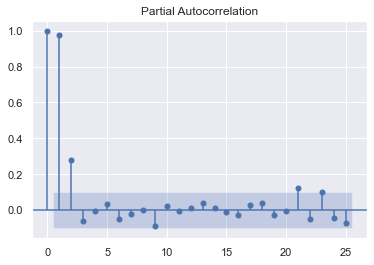

In [42]:
# Plot partial autocorrelation for 25 lags
plot_pacf(teleco_train, lags=25)
plt.show()

### Spectral Density

(array([6.97387711e+03, 3.91439441e+03, 5.47611144e+01, 1.10791953e+01,
        4.25439684e+00, 8.90767103e+00, 9.32436541e+00, 5.07699490e+00,
        4.50820186e+00, 1.97142105e+00, 3.17930644e+00, 2.05465010e+00,
        1.27856111e-01, 9.12357670e-01, 1.58928494e+00, 1.82600308e+00,
        1.37345831e+00, 1.08602805e+00, 3.71664573e-01, 4.01447712e-01,
        6.67019362e-01, 4.28134847e-01, 1.08303874e+00, 5.05461139e-01,
        1.49612021e-01, 2.01156666e-01, 2.01929017e-01, 3.62482513e-02,
        4.74386760e-01, 5.46619399e-01, 2.44460915e-01, 4.75225583e-01,
        2.85007556e-01, 7.59631735e-02, 2.43183009e-01, 7.19503505e-02,
        3.60475608e-01, 2.18971480e-01, 1.23421972e-01, 1.69234109e-01,
        1.69371921e-01, 1.14748035e-01, 2.14144408e-01, 2.82736486e-01,
        3.17059554e-02, 1.62458482e-02, 3.98324693e-02, 6.38895068e-02,
        4.57061837e-02, 6.54718394e-02, 1.72598760e-01, 1.32802101e-01,
        6.74716970e-02, 1.61089989e-02, 1.42266347e-01, 1.236409

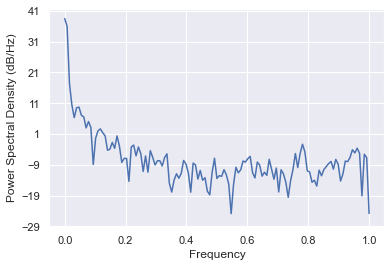

In [43]:
# Run spectral density function
plt.psd(teleco_df['Revenue'])

## D2. ARIMA Model

In section C3 (stationarity), we determined that our data was non-stationary.  To be modeled for forecasting future values, we therefore need to difference the data to convert it to stationary data

In [44]:
# Difference the data points
# First difference
first_diff = teleco_df.diff().dropna()

In [45]:
# Run ADF test on the differenced DataFrame
result = adfuller(first_diff['Revenue'])

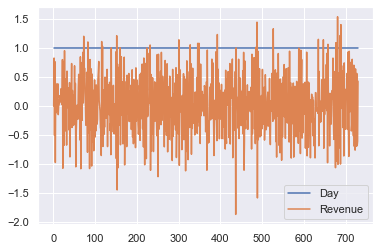

In [46]:
# Plot the result
fig, ax = plt.subplots()
first_diff.plot(ax=ax)
plt.show()

In [47]:
# Print test statistic and p-value
print('ADF statistic:', result[0])
print('p-value:', result[1])

ADF statistic: -44.874527193875984
p-value: 0.0


 The result has smaller p-value. We will input this into the ARIMA model.  We will then fit the data to auto_arima to create an optimal arima model

In [48]:

# Import auto_arima class
from pmdarima import auto_arima

In [49]:
# Fit auto_arima to dataset
auto_arima_fit = auto_arima(teleco_df['Revenue'], start_P=1,
                           start_q=1,
                           max_p=3,
                           max_q=3,
                           m=12,
                           seasonal=True,
                           d=None,
                           D=1,
                           trace=True,
                           error_action='ignore', 
                           suppress_warnings=True,
                           stepwise=True)

auto_arima_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=4.69 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2367.159, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1419.537, Time=1.03 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1969.738, Time=0.77 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2399.547, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1568.311, Time=0.21 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1320.755, Time=3.98 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=12.39 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.51 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2339.965, Time=2.33 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1147.041, Time=7.13 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1256.245, Time=2.10 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=15.38 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.55 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  731
Model:             SARIMAX(3, 0, 2)x(2, 1, [], 12)   Log Likelihood                -557.363
Date:                             Mon, 11 Apr 2022   AIC                           1132.727
Time:                                     15:59:32   BIC                           1173.927
Sample:                                          0   HQIC                          1148.633
                                             - 731                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0063      0.003      1.807      0.071      -0.001       0.013
ar.L1          1.4360      0.075     19.233      0.000       1.290       1.582
ar.L2         -0.0315      0.127     -0.248      0.804      -0.280       0.217
ar.L3         -0.4161      0.071     -5.861      0.000      -0.555      -0.277
ma.L1         -0.9708      0.083    -11.662      0.000      -1.134      -0.808
ma.L2          0.1067      0.079      1.359      0.174      -0.047       0.261
ar.S.L12      -0.7123      0.039    -18.432      0.000      -0.788      -0.637
ar.S.L24      -0.3791      0.040     -9.566      0.000      -0.457      -0.301
sigma2         0.2739      0.016     17.531      0.000       0.243       0.305
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.90
Prob(Q):                              0.95   Prob(JB):                         0.39
Heteroskedasticity (H):               1.06   Skew:                             0.01
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### The results of the report suggest:
Best model: SARIMAX(3,0,2)(2,1,0)\[12\]

Where:
<br>
p = the order of the autoregressive (AR) term &#10233; the number of lags to be used as predictors
<br>
d = the intergated (I) term &#10233; the minimum number of differencing used to make the data stationary
<br>
q = the order of the moving average (MA) term &#10233; the number of lagged (past) forecast errors to be used

#### Again, we will split the DataFrame into training and test sets.

In [50]:
# Split the DataFrame in half
teleco_df['Day'] = teleco_df.index
teleco_train = teleco_df.iloc[:len(teleco_df) - 365]

teleco_train['teleco_train'] = teleco_train['Revenue']
del teleco_train['Day']
del teleco_train['Revenue']

In [51]:
# Test set
teleco_test = teleco_df.iloc[len(teleco_df) - 365:]

teleco_test['teleco_test'] = teleco_test['Revenue']
del teleco_test['Day']
del teleco_test['Revenue']

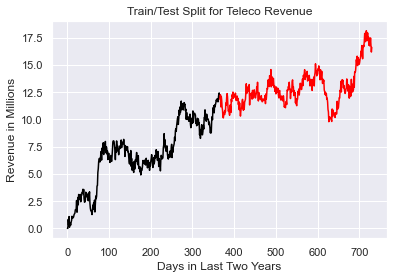

In [52]:
# Visualize training and test sets side-by-side
plt.plot(teleco_train, color='black')
plt.plot(teleco_test, color='red')
plt.title('Train/Test Split for Teleco Revenue')
plt.xlabel('Days in Last Two Years')
plt.ylabel('Revenue in Millions')
sns.set()
plt.show()

#### SARIMAX model

In [53]:
# Import statsmodels API
import statsmodels.api as sm

# Build SARIMAX model
model = sm.tsa.SARIMAX(teleco_train, 
                      order=(3, 0, 2),
                      seasonal_order=(2, 1, 0, 12),
                      enforce_stationarity=False,
                      enforce_invertibility=False)

SARIMAX_results = model.fit()

# Print results tables
print(SARIMAX_results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                        teleco_train   No. Observations:                  366
Model:             SARIMAX(3, 0, 2)x(2, 1, [], 12)   Log Likelihood                -247.972
Date:                             Mon, 11 Apr 2022   AIC                            511.944
Time:                                     15:59:35   BIC                            542.263
Sample:                                          0   HQIC                           524.042
                                             - 366                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3589      0.117     11.582      0.000       1.129       1.589
ar.L2          0.0669      

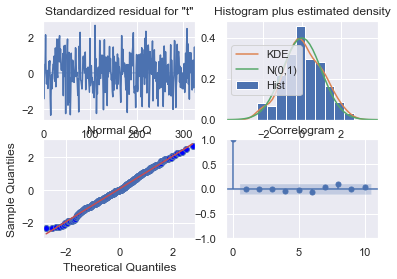

In [54]:
SARIMAX_results.plot_diagnostics()
plt.show()

## D3. Forecasting Using ARIMA Model


In this section, I will forcast the actual revenue using the ARIMA model.


In [55]:
# Perform forecast
result = SARIMAX_results.get_forecast()

# Summarize forecast and confidence intervals
test_1 = teleco_test['teleco_test'].values.astype('float32')
forecast = result.predicted_mean
print('Expected: %.2f' % forecast)
print('Forecast: %.2f' % test_1[0])
print('Standard Error: %.2f' % result.se_mean)

Expected: 12.24
Forecast: 11.85
Standard Error: 0.52


In [56]:
# Set intervals
intervals = [0.2, 0.1, 0.05, 0.01]
for a in intervals:
    ci = result.conf_int(alpha=a)
    print('%.1f%% Confidence Interval: %.2f between %.2f and  %.2f' % ((1 - a) * 100, forecast, ci['lower teleco_train'], ci['upper teleco_train']))
    
ci

80.0% Confidence Interval: 12.24 between 11.58 and  12.90
90.0% Confidence Interval: 12.24 between 11.39 and  13.09
95.0% Confidence Interval: 12.24 between 11.23 and  13.25
99.0% Confidence Interval: 12.24 between 10.91 and  13.57


,lower teleco_train,upper teleco_train
366,10.909452,13.567244


Next we will make predictions using the test set

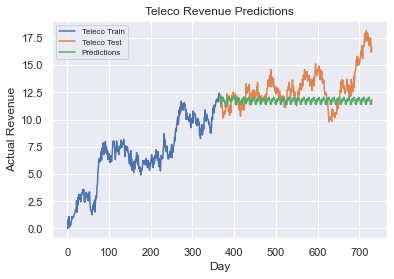

In [57]:
start = len(teleco_train)
end = len(teleco_train) + len(teleco_test) - 1

# Predict with respect to test set
predictions = SARIMAX_results.predict(start, end, typ = 'levels').rename('Predictions')
plt.plot(teleco_train, label = 'Teleco Train')
plt.plot(teleco_test, label = 'Teleco Test')
plt.plot(predictions, label = 'Predictions')
plt.title('Teleco Revenue Predictions')
plt.xlabel('Day')
plt.ylabel('Actual Revenue')
plt.legend(loc='upper left', fontsize = 8)
plt.show()

#### Now, we will make predictions with respect to the complete dataset.

In [58]:
# Train the model on the complete dataset
model = sm.tsa.statespace.SARIMAX(teleco_df['Revenue'], 
                                  order=(3, 0, 2), 
                                  seasonal_order=(2, 1, 0, 12), 
                                  enforce_stationarity=False, 
                                  enforce_invertibility=False)

results = model.fit()

<AxesSubplot:>

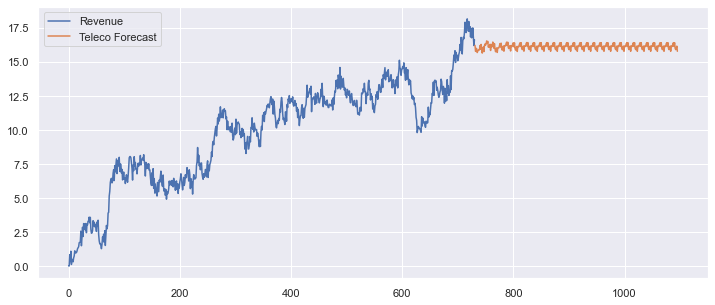

In [59]:
# Forecast for the coming year
forecast = results.predict(start = len(teleco_df['Revenue']),
                          end = (len(teleco_df['Revenue']) - 1) + 365,
                          typ = 'level').rename('Teleco Forecast')

# Visualize predicted values 
teleco_df['Revenue'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

## D4 and D5 Output and Calculations and Code

In [60]:
# Import evaluation packages from Scikit-learn
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Run Mean Squared Error
MSE = mean_squared_error(teleco_test['teleco_test'], predictions)
print('MSE: ', round(MSE, 4))

MSE:  4.0188


In [61]:
# Run Root Mean Squared Error
RMSE = rmse(teleco_test['teleco_test'], predictions)
print('RMSE: ', round(RMSE, 4))

RMSE:  2.0047


# Part V: Data Summary and Implications

## E1. Results
Selecting the ARIMA Model: 

I selected a elected the SARIMAX model with values of (3,0,2)(2,1,0)(12), after fitting the dataset to auto_armia to generate optimal p, d, and q values.  The Akaike Information Criterio) resulted in a value of 511.944, which was lower than other metrics 


<b>Forecast Prediction Intervals</b>

We tested four confidence intervals on our dataset:
* 80.0% Confidence Interval: 12.24 between 11.58 and  12.90
* 90.0% Confidence Interval: 12.24 between 11.39 and  13.09
* 95.0% Confidence Interval: 12.24 between 11.23 and  13.25
* 99.0% Confidence Interval: 12.24 between 10.91 and  13.57

When evaluating this data using the 95% confidence interval, there is only a 5% probability that the real observation will fall out side the range of 11.23 and 13.25.

<b>Justification of the forecast length</b>

One year of revenues was used in the prediction to give business users short term forcasts. The forcasted frequency predicts the ups and downs throughout the year, however is lacking compared to the upward trend of the previous two years. Further analysis would be able to narrow the range of this forcasted reveneue, and be able to give business users a tigther forcasted range to work with. 

<b>Model Evaluation and Error Metrics</b>

The metrics used for the evaluation of this SARIMAX model were mean square error (MSE) and root mean square error. The values for MSE was 4.0189, while RMSE was 2.0047. Given that these values are small relative to the range of data, we can conclude that this model is usable for prediction. 


## E2. Annotated Visualization

#### Test set forecast

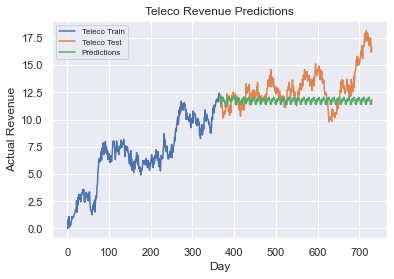

In [62]:
start = len(teleco_train)
end = len(teleco_train) + len(teleco_test) - 1

# Predict with respect to test set
predictions = SARIMAX_results.predict(start, end, typ = 'levels').rename('Predictions')
plt.plot(teleco_train, label = 'Teleco Train')
plt.plot(teleco_test, label = 'Teleco Test')
plt.plot(predictions, label = 'Predictions')
plt.title('Teleco Revenue Predictions')
plt.xlabel('Day')
plt.ylabel('Actual Revenue')
plt.legend(loc='upper left', fontsize = 8)
plt.show()

#### Final model

<AxesSubplot:>

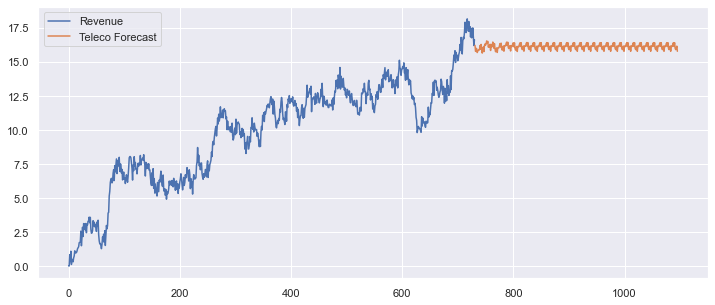

In [63]:
# Forecast for the coming year
forecast = results.predict(start = len(teleco_df['Revenue']),
                          end = (len(teleco_df['Revenue']) - 1) + 365,
                          typ = 'level').rename('Teleco Forecast')

# Visualize predicted values 
teleco_df['Revenue'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

## E3. Recommendations

The time series analysis we created suggests both periodicity and a continuation of past performance. Statistical analysis seem to suggest that the more a customer subscribes to services, the less likely they are to churn. These purchases and subscriptions might be the source of the variations in the time series trends. 

However, as the large drops in revenue should be investigated to see the context of the drop in revenue. Specifically, it would be important to investigate any unexpected events that could've caused the drops in revenue. It would be even more important to check to see what types of customers left and caused the drops in revenue. 

Given that the rate churn is around 26.5%, this is not much a difference from telecommunication industry averages. Assuming no unexpected events, it is likely revenue will remain on a similar upward trend.


Based on this,  I would recommend that the stakeholders of the telecommunications company continue their churn mitigation efforts. I would also suggest that they continue to look for new cost-effective methods that can add to their customer base. The combined efforts of both actions should ensure that the upward revenue trend continues.

# Part VI:  Reporting

## F. Reporting
Jupyter Notebook and PDF is include in the submission of this assignment.


## Sources

- Bowne-Anderson, H. (2018, January 17). Python time series Analysis Tutorial. Retrieved April 07, 2022, from https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

- Fulton, J. (n.d.). ARIMA Models in Python. Retrieved April 2, 2022, from 
https://learn.datacamp.com/courses/arima-models-in-python

- Jones, E., Oliphant, T., Peterson, P. & others (2001). SciPy: Open source scientific tools for Python. Retrieved April 07, 2022, from https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html

## H. Sources

* Brownlee, J. &ensp; (2020, August 14). &ensp; <i>A Gentle Introduction to Autocorrelation and Partial Autocorrelation</i> &ensp; MachineLearningMastery &ensp; https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

* Information Technology Laboratory (ITL). &ensp; (2021). &ensp; <i>Engineering Statistics Handbook.</i> &ensp; National Institute of Standards and Technology (NIST). &ensp; https://www.itl.nist.gov/

* VanderPlas, J. &ensp; (2017). &ensp; <i>Python Data Science Handbook</i>. &ensp; O'Reilly.